# MLP for MNIST classification

In [5]:
#!pip install torch
#!pip install torchvision
#!pip install matplotlib
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as t
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


In [3]:

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.001
num_epochs = 10
batch_size = 64



In [4]:
device

device(type='cpu')

In [5]:
# Load MNIST dataset
# transform has lots of options. You may do following:
# 1. Random Resized Crop
# 2. Random Horizonal Flip
# 3. To DType
# 4. Normalize based on mean / std etc....
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)


# Dataloader is used to create batch sets with size. Shuffling, sampling, no of workers are some of the options avaiable
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



In [6]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    # Forward comes from nn.Module inheritance. It can be used in some examples like skipping hidden layer or may be size of different connection
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [7]:
# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')



Epoch [1/10], Step [100/938], Loss: 0.4190
Epoch [1/10], Step [200/938], Loss: 0.3011
Epoch [1/10], Step [300/938], Loss: 0.4483
Epoch [1/10], Step [400/938], Loss: 0.3761
Epoch [1/10], Step [500/938], Loss: 0.1540
Epoch [1/10], Step [600/938], Loss: 0.1412
Epoch [1/10], Step [700/938], Loss: 0.2797
Epoch [1/10], Step [800/938], Loss: 0.2070
Epoch [1/10], Step [900/938], Loss: 0.3395
Epoch [2/10], Step [100/938], Loss: 0.1432
Epoch [2/10], Step [200/938], Loss: 0.1075
Epoch [2/10], Step [300/938], Loss: 0.1278
Epoch [2/10], Step [400/938], Loss: 0.2754
Epoch [2/10], Step [500/938], Loss: 0.2011
Epoch [2/10], Step [600/938], Loss: 0.1369
Epoch [2/10], Step [700/938], Loss: 0.1685
Epoch [2/10], Step [800/938], Loss: 0.2005
Epoch [2/10], Step [900/938], Loss: 0.1877
Epoch [3/10], Step [100/938], Loss: 0.0677
Epoch [3/10], Step [200/938], Loss: 0.1205
Epoch [3/10], Step [300/938], Loss: 0.1533
Epoch [3/10], Step [400/938], Loss: 0.2523
Epoch [3/10], Step [500/938], Loss: 0.1041
Epoch [3/10

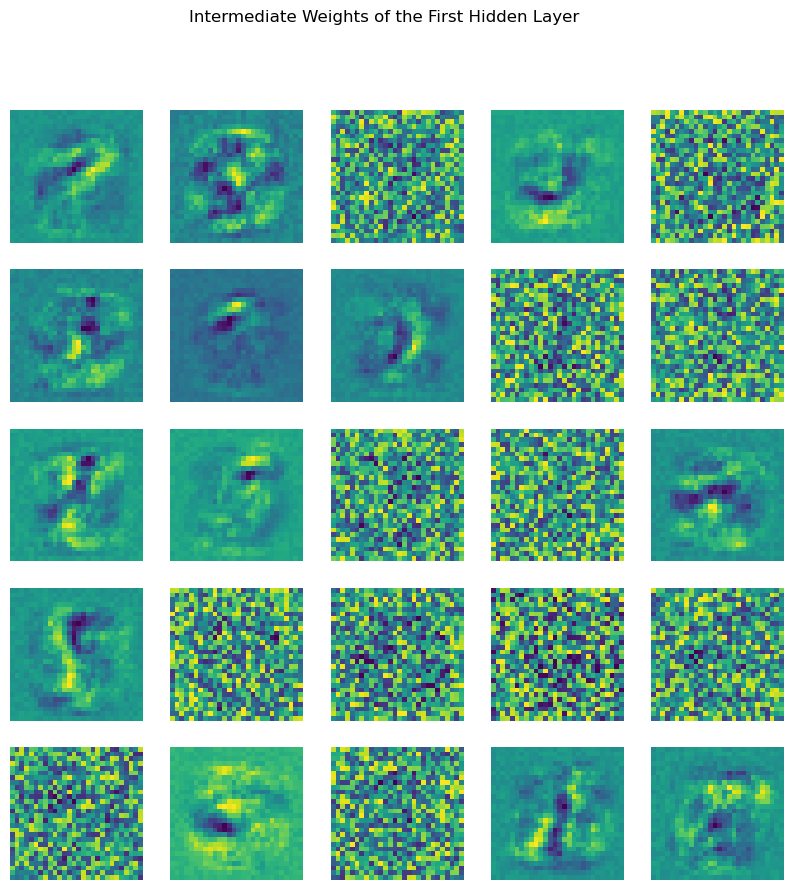

In [8]:
# Plot intermediate weights
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle('Intermediate Weights of the First Hidden Layer')

for i, ax in enumerate(axes.flat):
    weight = model.fc1.weight[i].detach().cpu().numpy().reshape(28, 28)
    ax.imshow(weight, cmap='viridis')
    ax.axis('off')

plt.show()


## Pytorch MLP for iris dataset

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Hyperparameters
input_size = 4  # Number of features in the Iris dataset
hidden_size = 8
output_size = 3  # Number of classes in the Iris dataset
learning_rate = 0.001
num_epochs = 50
batch_size = 64

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader):
        features, labels = features.to(device), labels.to(device)

        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for features, labels in test_loader:
        features, labels = features.to(device), labels.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.7333


# Code shared by Pankaj

In [10]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
train_dataset=tv.datasets.MNIST('./data', train=True, download=True,
                                transform=transforms.ToTensor())
test_dataset=tv.datasets.MNIST('./data', train=False, download=True,
                               transform=transforms.ToTensor())
from torch.utils.data import DataLoader
batch_size=32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                         shuffle=False)
import torch.nn as nn
class MNIST_Model(nn.Module):
  def __init__(self):
    super(MNIST_Model, self).__init__()
    print("My first Model is created")
    self.flatten= nn.Flatten()
    self.input=nn.Linear(in_features=784, out_features=128)
    self.hidden=nn.Linear(in_features=128, out_features=64)
    self.output=nn.Linear(in_features=64, out_features=10)
    self.relu=nn.ReLU()
  def forward(self, x):
    x=self.flatten(x) # preprocessign 28X28 --> 784
    x = self.input(x) # input layer
    x=self.relu(x)
    x=self.hidden(x) # hidden layer
    x=self.relu(x)
    x=self.output(x) # output layer
    return x
model=MNIST_Model()
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
learning_rate=0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)
model=model.to(device)
import time
from tqdm import tqdm
import numpy as np
start_time=time.time()
max_epoch=10

My first Model is created
cpu


In [11]:
train_dataset=tv.datasets.MNIST('./data', train=True, download=True,
                                transform=transforms.ToTensor())
test_dataset=tv.datasets.MNIST('./data', train=False, download=True,
                               transform=transforms.ToTensor())


In [12]:
from torch.utils.data import DataLoader
batch_size=32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                         shuffle=False)


In [13]:
import torch.nn as nn
class MNIST_Model(nn.Module):
  def __init__(self):
    super(MNIST_Model, self).__init__()
    print("My first Model is created")
    self.flatten= nn.Flatten()
    self.input=nn.Linear(in_features=784, out_features=128)
    self.hidden=nn.Linear(in_features=128, out_features=64)
    self.output=nn.Linear(in_features=64, out_features=10)
    self.relu=nn.ReLU()
  def forward(self, x):
    x=self.flatten(x) # preprocessign 28X28 --> 784
    x = self.input(x) # input layer
    x=self.relu(x)
    x=self.hidden(x) # hidden layer
    x=self.relu(x)
    x=self.output(x) # output layer
    return x


In [14]:
model=MNIST_Model()
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
learning_rate=0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)
model=model.to(device)


My first Model is created
cpu


In [15]:
import time
from tqdm import tqdm
import numpy as np
start_time=time.time()
max_epoch=10


In [16]:
for epoch in range(max_epoch):  
  # pass data through model for training
  mean_train_loss=0
  mean_val_loss=0


In [17]:
for data, label in tqdm(train_loader):
  # print(data.shape, label)
  # Put data to GPU
  data=data.to(device)
  label=label.to(device)
  # Feed forward
  out=model(data)
  # print(out.shape)
  # Training Loss calculation
  train_loss=loss_fn(out, label)
  # print(train_loss)
  # Backward pass and optimization
  optimizer.zero_grad()
  # backprop
  train_loss.backward()
  # weight updation
  optimizer.step()
  # print("train loss ",train_loss)
  mean_train_loss+=train_loss.item()
  # break 
# validation
total=0
correct=0


100%|██████████| 1875/1875 [00:15<00:00, 121.96it/s]


In [18]:
with torch.no_grad():
  for data, label in tqdm(test_loader):
    # print(data.shape, label)
    # Put data to GPU
    data=data.to(device)
    label=label.to(device)
    # Feed forward
    out=model(data)
    # print(out.shape)
    # validation Loss calculation
    val_loss=loss_fn(out, label)
    # print("val loss ",val_loss)

    _, predicted = torch.max(out, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()
    mean_val_loss+=val_loss
    # break


100%|██████████| 313/313 [00:01<00:00, 182.79it/s]


In [19]:
mean_train_loss = mean_train_loss/len(train_loader)
mean_test_loss = mean_val_loss/len(test_loader)
accuracy = correct / total

print('\nEpoch: {}/{} train Loss :{:.4f} Test Loss:{:.4f}  Test Accuracy: {:.4f}'
.format(epoch,max_epoch, mean_train_loss, mean_test_loss, accuracy*100))


Epoch: 9/10 train Loss :1.1537 Test Loss:0.4312  Test Accuracy: 87.9900


In [ ]:
#CIFAR 10 dataset